In [1]:
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def plotGraph(history):
    loss,acc,val_loss,val_acc = history.history.values()
    epochs = range(1,len(loss)+1)
    # Plot graph
    plt.plot(epochs,acc,'r-^',label = 'Training Accuracy')
    plt.plot(epochs,val_acc,'b-*', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs,loss,'r-^',label='Training Loss')
    plt.plot(epochs,val_loss,'b-*',label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.figure()

def trainModel(model):
    model.compile(loss ='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    model.summary()
    plotGraph(model.fit(training_padded, training_label, epochs=10, validation_data=(testing_padded, testing_label)))

vocab_size = 10000
embedding_dim = 16
trunc_type = 'post'
padding_type = 'post'
oov_token = '<OOV>'
training_size = 18000 #总共26710条左右
max_length = 150

with open('sarcasm.json','r',encoding='utf-8') as f:
    data = json.load(f)

training_data, training_label = [x['headline'] for x in data[:training_size]], [x['is_sarcastic'] for x in data[:training_size]]
testing_data, testing_label = [x['headline'] for x in data[training_size:]], [x['is_sarcastic'] for x in data[training_size:]]

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_data)

word_index = tokenizer.word_index

training_sequence = tokenizer.texts_to_sequences(training_data)
training_padded = pad_sequences(training_sequence, maxlen = max_length, padding = padding_type, truncating=trunc_type)
testing_sequence = tokenizer.texts_to_sequences(testing_data)
testing_padded = pad_sequences(testing_sequence, maxlen = max_length, padding = padding_type, truncating=trunc_type)

training_padded = np.array(training_padded)
training_label = np.array(training_label)
testing_padded = np.array(testing_padded)
testing_label = np.array(testing_label)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 35)                595       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 36        
Total params: 160,631
Trainable params: 160,631
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
563/563 [==============================] - 15s 25ms/step - loss: 0.6854 - accuracy: 0.5544 - val_loss: 0.6464 - val_accuracy: 0.5660
Epoch 2/10
563/563 [==============================] - 17s 31ms/step - loss: 0.5640 - accuracy: 0.7267 

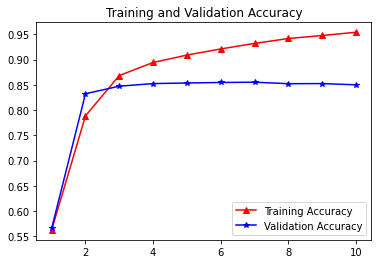

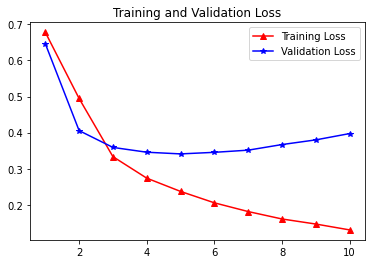

<Figure size 432x288 with 0 Axes>

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(35, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
trainModel(model)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 150, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense_4 (Dense)              (None, 35)                2275      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 36        
Total params: 174,855
Trainable params: 174,855
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
563/563 [==============================] - 58s 92ms/step - loss: 0.5414 - accuracy: 0.6956 - val_loss: 0.3366 - val_accuracy: 0.8485
Epoch 2/10
563/563 [==============================] - 52s 92ms/step - loss: 0.2116 - accuracy: 0.9175 

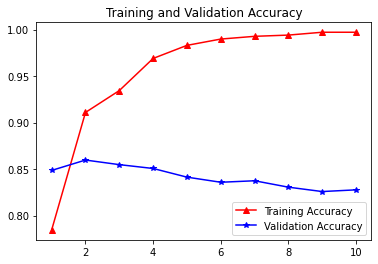

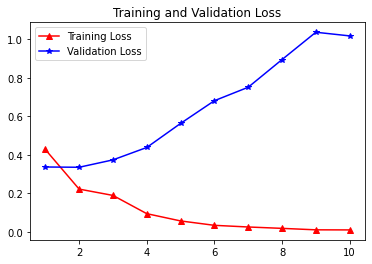

<Figure size 432x288 with 0 Axes>

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(35, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
trainModel(model)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 150, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 146, 128)          10368     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 35)                4515      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 36        
Total params: 174,919
Trainable params: 174,919
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
563/563 [==============================] - 17s 27ms/step - loss: 0.6297 - accuracy: 0.6252 - val_loss: 

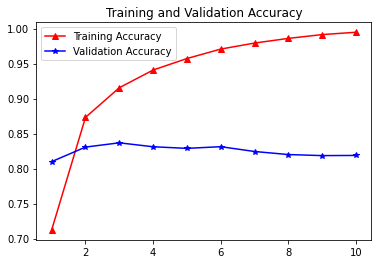

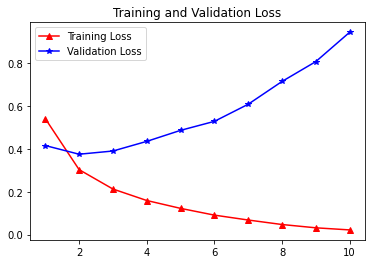

<Figure size 432x288 with 0 Axes>

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(35, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
trainModel(model)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                9600      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 171,713
Trainable params: 171,713
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
563/563 [==============================] - 47s 73ms/step - loss: 0.5167 - accuracy: 0.7140 - val_loss: 0.3324 - val_accuracy: 0.8545
Epoch 2/10
563/563 [==============================] - 40s 71ms/step - loss: 0.2165 - accuracy: 0.9125 

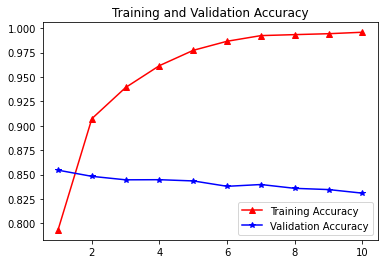

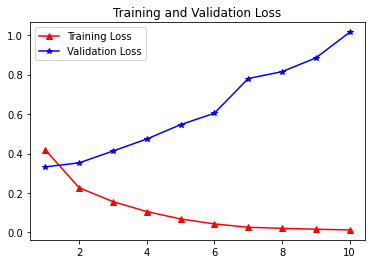

<Figure size 432x288 with 0 Axes>

In [5]:
# Bidirectional(GRU(32))
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])
trainModel(model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 150, 128)          31488     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                31104     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 224,705
Trainable params: 224,705
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
563/563 [==============================] - 47s 67ms/step - loss: 0.5022 - accuracy: 0.7266 - val_loss: 0.

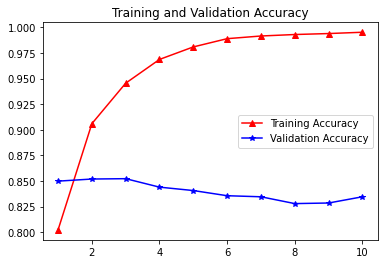

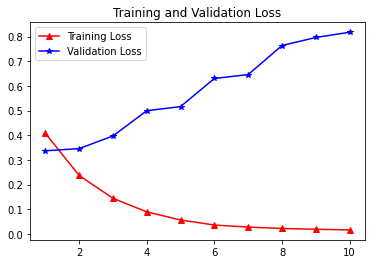

<Figure size 432x288 with 0 Axes>

In [2]:
# Bidirectional(GRU(32))
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])
trainModel(model)